In [1]:
import numpy as np

import matplotlib.pyplot as plt

# Pearson's correlation factor
---

Given a random variable $X$, from which a random variable is created by $Y = m X + Z$, where $Z$ is a random variable representing the noise. We assume that:

* the signal X and the noise Z are independent
* X has mean 0 and variance $\sigma_x^2$
* Z has mean 0 and variance $\sigma_z^2$
* Y has mean 0 and variance $\sigma_y^2 = m^2 \sigma_x^2 + \sigma_z^2$ (variance of independent variables are added)

<br>

### Improved guessing

Y has a dependency to X. Thus, if we have some information on the value of X, we can have a better estimation of Y than if we did not have any information on X.

* Without knowing X, the best guess we could do for Y would be: $Y_p = E[Y]$
* With knowledge of Y, the best guess we can do for Y is: $Y_p = E[Y|X]$


If $E[Y|X] = E[Y]$, then there is no correlation between X and Y. The variance of the value around $Y_p$ is the same as the variance of $Y$.

If $E[Y|X] \neq E[Y]$, then there is a correlation between X and Y. The variance of the value around $Y_p$ should be reduced to the variance of the noise $Z$ (in fact, in case of regression tasks, the error can be decomposed as: $noise_{data} + bias_{model}^2 + var_{model}$).

<br>

### Correlation factor

This linear dependency can be estimated by computing a correlation factor between X and Y:

&emsp; $r= \frac{m \sigma_x}{\sigma_y} = \frac{m \sigma_x}{\sqrt{m^2 \sigma_x^2 + \sigma_z^2}}$

It measure the ratio of variance of $Y$ knowing $X$ over the variance of $Y$ not knowing $X$. Said diffently, it measures the improvement of precision (the reduction of error) introduced by the knowledge of $X$.

* A correlation factor of 1 or -1 corresponds to a value of $\sigma_z = 0$ (no noise and perfect prediction of $Y$ from $X$)
* A correlation factor of 0 corresponds to $m = 0$ (no linear relationship between X and Y exist).

Another way to see it, that might show a different insight:

&emsp; $r^2 = \frac{m^2 \sigma_x^2}{m^2 \sigma_x^2 + \sigma_z^2} = 1 - \frac{\sigma_z^2}{\sigma_y^2} \implies \frac{\sigma_z^2}{\sigma_y^2} = 1 - r^2$ (reduction of variance is 1 minus square of correlation)

From the correlation factor, we can compute the linear factor $m=r \frac{\sigma_y}{\sigma_x}$ in case we want to do a regression.

<br>

### Practical estimation

In general, we do not have the value of $m$, so the correlation factor $r$ above cannot be computed as shown above.

Instead we compute it using the covariance: $r= \frac{Cov[X,Y]}{\sigma_x \sigma_y}$, where the covariance:

* is given by: $E[(X-\bar{X})(Y-\bar{Y})] = E[XY] - E[X]E[Y]$
* can be estimated by: $\frac{1}{N-1} \sum_{i=1}^n (x_i - \bar{x_i}) (y_i - \bar{y_i})$

If flows from (ignoring the means and based on X and Y being independent):

* $Cov[X,Y] = E[XY] = E[X(mX+Z)] = m E[X^2] + E[XZ] = m \sigma_x^2 + 0$
* $r= \frac{Cov[X,Y]}{\sigma_x \sigma_y} = \frac{m \sigma_x^2}{\sigma_x \sigma_y} = \frac{m \sigma_x}{\sigma_y}$

We can then deduce the factor $m$ (how $Y$ varies in function of $X$) by the formula $m=r \frac{\sigma_y}{\sigma_x} = \frac{Cov[X,Y]}{\sigma_x^2}$.

We can also deduce the reversed factor (how $X$ varies in function of $Y$) by the formula $m'=r \frac{\sigma_x}{\sigma_y} = \frac{Cov[X,Y]}{\sigma_y^2}$.

# Example and illustration of "regression toward the mean"
---

Creation of two random variable $X$ and $Y$ with a linear correlation.

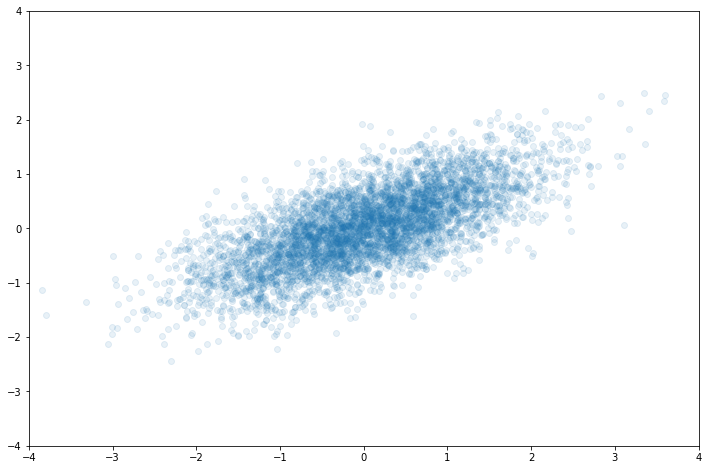

In [2]:
n = 5000
xs = np.random.normal(loc=0.0, scale=1.0, size=n)
ys = 0.5 * xs + np.random.normal(loc=0.0, scale=0.5, size=n)

plt.figure(figsize=(12, 8))
plt.scatter(xs, ys, alpha=0.1)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()

Computation of the variance of $X$ and $Y$, their standard deviations, the covariance and correlation factor between the two variables.

In [3]:
mean_x = 1 / n * np.sum(xs)
mean_y = 1 / n * np.sum(ys)
print("sample mean of X:", mean_x)
print("sample mean of Y:", mean_y)

var_x = 1 / (n - 1) * ((xs - mean_x).T @ (xs - mean_x))
var_y = 1 / (n - 1) * ((ys - mean_y).T @ (ys - mean_y))
print("sample variance of X:", var_x)
print("sample variance of Y:", var_y)

std_x = np.sqrt(var_x)
std_y = np.sqrt(var_y)

cov = 1 / (n - 1) * ((ys - mean_y).T @ (xs - mean_x))
cor = cov / (std_x * std_y)
print("sample covariance: ", cov)
print("correlation:", cor)

sample mean of X: 0.008908499218795659
sample mean of Y: 0.010807488200689197
sample variance of X: 1.00326415920086
sample variance of Y: 0.5033598410029446
sample covariance:  0.49387013490730775
correlation: 0.6949696417097512


### Regression lines

We can now display the regression lines:

* $m1$ (how $Y$ varies in function of $X$)
* $m2$ (how $X$ varies in function of $Y$)
* $m$ (the ratio of standard deviation between X and Y)

X to Y: 0.4922633090976708
Y to X: 0.9811472721448564


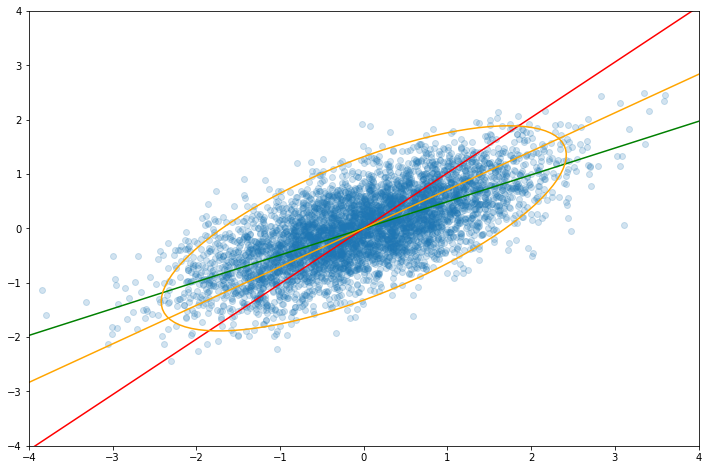

In [4]:
m1 = cov / var_x
m2 = cov / var_y
m = std_x / std_y
print("X to Y:", m1)
print("Y to X:", m2)


def make_elipse(xs, ys):
    # Compute the variance along the principal axis (eigen values of the covariance matrix)
    coords = np.concatenate((np.expand_dims(xs, axis=-1), np.expand_dims(ys, axis=-1)), axis=-1)
    cov_matrix = 1 / (len(xs) - 1) * coords.T @ coords
    eig_vals, eig_vects = np.linalg.eig(cov_matrix)
    eig_vals = np.sqrt(eig_vals)
    
    thetas = np.linspace(0., 2 * np.pi, 100)
    ellipse_xs = 2.5 * eig_vals[0] * np.cos(thetas)
    ellipse_ys = 2.5 * eig_vals[1] * np.sin(thetas)
    tilt = np.arctan2(std_y, std_x)
    xs2 = np.cos(tilt) * ellipse_xs - np.sin(tilt) * ellipse_ys
    ys2 = np.sin(tilt) * ellipse_xs + np.cos(tilt) * ellipse_ys
    return xs2, ys2


plt.figure(figsize=(12, 8))
plt.scatter(xs, ys, alpha=0.2)
plt.plot([-4, 4], [-4*m1, 4*m1], color='green')
plt.plot([-4, 4], [-4/m2, 4/m2], color='red')
plt.plot([-4, 4], [-4/m, 4/m], color='orange')
plt.plot(*make_elipse(xs, ys), color='orange')
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()

We see that:

1. The regression line of m1 passes through the left border of the ellipse
2. The regression line of m2 passes through the upper border of the ellipse

This is expected: these regression lines are placed such that the number of points above and below is balanced. They minimize the variance around the prediction (the least squares).

This is what we call the "regression toward the mean":

* if we take the value Y matching X, then X matching Y and so one, we reach the mean
* this show the classic phenomena of "a great year for a player is followed by a less great one": there is no necessity for causal reason behind this, only statistics
* performance = talent + luck : an exceptional year is likely due to high luck as well as high talent

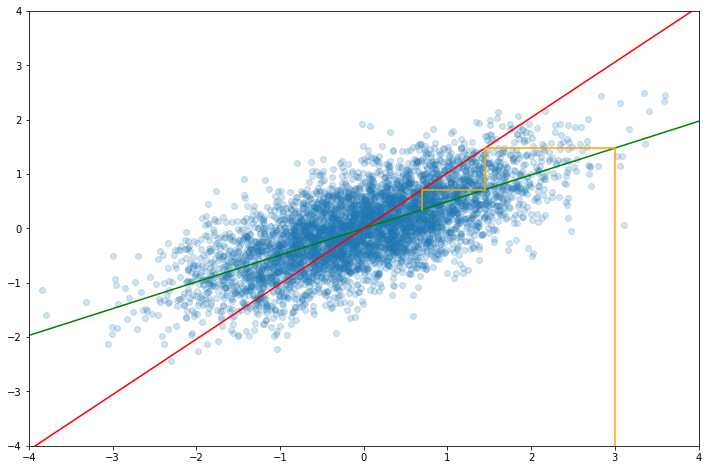

In [5]:
x1 = 3
y1 = m1 * x1
x2 = m2 * y1
y2 = m1 * x2
x3 = m2 * y2
y3 = m1 * x3

plt.figure(figsize=(12, 8))
plt.scatter(xs, ys, alpha=0.2)
plt.plot([-4, 4], [-4*m1, 4*m1], color='green')
plt.plot([-4, 4], [-4/m2, 4/m2], color='red')
plt.plot([x1, x1, x2, x2, x3, x3], [-4, y1, y1, y2, y2, y3], color='orange')
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()

### Linear regression (closed form)

Here done using the pseudo-inverse matrix.

* Matrix $X \in R^{n \times p}$ where $n$ is the number of samples, and $p$ is the number of features
* Matrix $Y \in R^{n \times l}$ where $n$ is the number of samples, and $l$ is the number of outputs
* Matrix $W \in R^{p \times l}$ of weights such that $Y_{pred} = X W$

We want to minimize the error $E = (X W - Y)^2$, as minimizing the square corresponds to maximizing the likelihood if we assume the noise around the prediction is gaussian (and isotropic in case of multiple outputs).

**TODO: write down the proof**

$E = (X W - Y)^2 = (X W - Y)^T (X W - Y) = W^T X^T X W - Y^T X W - W^T X^T Y + Y^T Y$

We can transpose scalars freely (they are equal to their own transpose), so:

$E = (X W - Y)^T (X W - Y) = W^T X^T X W - 2 W^T X^T Y + Y^T Y$

Now we compute the gradient with respect to $W$:

$\nabla_W E = X^T X W + W^T X^T X - 2 X^T Y$

Since the matrix $X^T X$ is symetric, we have $W^T X^T X = X^T X W$:

$\nabla_W E = 2 X^T X W + - 2 X^T Y$

Setting the gradient to zero, we have: $X^T X W = X^T Y$

* $X^T X \in R^{p \times p}$ is the variance of the inputs $X$
* $X^T Y \in R^{p \times l}$ is the covariance of $X$ and $Y$
* $W$ is the ratio $\frac{Cov[X, Y]}{Var[X]}$, exactly what we had before

We can therefore solve for W:

$W = (X^T X)^{-1} X^T Y$

where $X^+ = (X^T X)^{-1} X^T$ is called the Moore-Penrose inverse matrix (if $X$ is invertible, the all expression collapses to $X^{-1}$)

0.4923203416671752


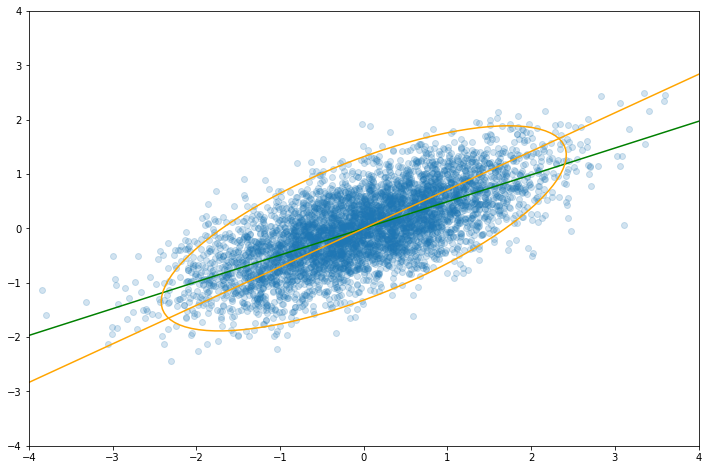

In [9]:
X = np.expand_dims(xs, axis=-1)
Y = np.expand_dims(ys, axis=-1)
W = np.linalg.inv(X.T @ X) @ X.T @ Y
m1 = W[0, 0]
print(m1)

plt.figure(figsize=(12, 8))
plt.scatter(xs, ys, alpha=0.2)
plt.plot([-4, 4], [-4*m1, 4*m1], color='green')
plt.plot([-4, 4], [-4/m, 4/m], color='orange')
plt.plot(*make_elipse(xs, ys), color='orange')
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()

### Linear regression (using SGD)

Here done using pytorch, will give you the same result

loss: 13.013274893164635
weight:  0.4928362965583801


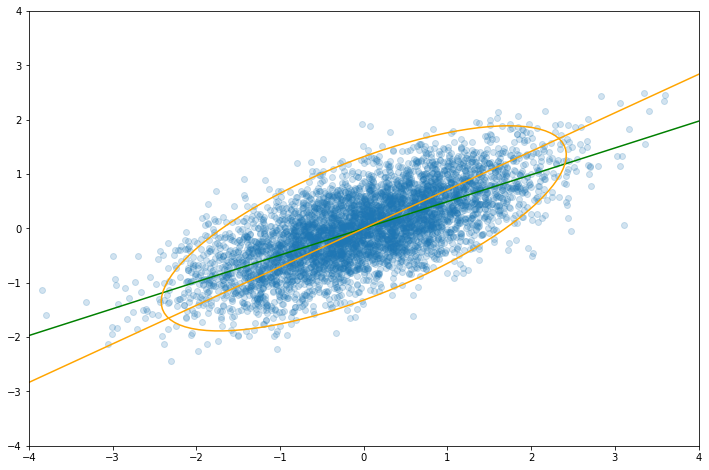

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data

model = nn.Linear(1, 1, bias=False)

optimizer = optim.Adam(model.parameters())
criterion = nn.MSELoss()
ds = data.TensorDataset(torch.FloatTensor(xs).unsqueeze(-1),
                        torch.FloatTensor(ys).unsqueeze(-1))
loader = data.DataLoader(ds, shuffle=True, batch_size=100)

episode_loss = float('inf')
for _ in range(100):
    episode_loss = 0.
    for x, y in loader:
        y_p = model(x)
        loss = criterion(y_p, y)
        optimizer.zero_grad()
        loss.backward()
        episode_loss += loss.item()
        optimizer.step()

m1 = model.weight.item()
print("loss:", episode_loss)
print("weight: ", m1)

plt.figure(figsize=(12, 8))
plt.scatter(xs, ys, alpha=0.2)
plt.plot([-4, 4], [-4*m1, 4*m1], color='green')
plt.plot([-4, 4], [-4/m, 4/m], color='orange')
plt.plot(*make_elipse(xs, ys), color='orange')
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()

# Mutual information (information theory)
---

<br>

### Entropy

The amount of information of event x, with probability p, is $h(x) = log \frac{1}{p(x)} = - log p(x)$.

The entropy of a a probability distribution is the expected value of the amount of information:

&emsp; $H[X] = E[h(x)] = - \sum_{x \in X} p \times log(p)$

Note that for a probability density function, it is not defined, the integral would be $\int dp \times log (p(x) dp)$ which is not a good measure of information: https://en.wikipedia.org/wiki/Entropy_(information_theory)#Extending_discrete_entropy_to_the_continuous_case

The conditional entropy is the entropy of a conditional probability:

&emsp; $H[X|Y] = - \sum_{x \in X, y \in Y} p(x,y) \times log p(x|y) = - \sum_{y \in Y} p(y) \sum_{x \in X} p(x|y) \times log p(x|y)$

And we have the following relation (equivalent of Bayes' rule), using the log properties:

&emsp; $H[X,Y] = H[X|Y] + H[Y] = H[Y|X] + H[X]$

<br>

### Relative entropy

The relative entropy of two sources of information is the KL divergence (only defined if $q(x) = 0 \Rightarrow p(x) = 0$, the absolute continuity property):

&emsp; $D_{KL}(p||q) = \sum_{x \in X} p(x) log \frac{p(x)}{q(x)} = - \sum_{x \in X} p(x) log \frac{q(x)}{p(x)}$

The version of probability distribution:

&emsp; $D_{KL}(p||q) = \int p(x) log \frac{p(x)}{q(x)} dp = - \int p(x) log \frac{q(x)}{p(x)} dp$

This is derivated from:

&emsp; $D_{KL}(P||Q) = \int log (\frac{dP}{dQ}) dP = \int log (\frac{dP}{d\mu} \frac{d\mu}{dQ}) \frac{dP}{d\mu} d\mu = \int log (\frac{p(\mu)}{q(\mu)}) p(\mu) d\mu$, where $p = \frac{dP}{d\mu}$ and $q = \frac{dQ}{d\mu}$

<br>

### Mutual information

The mutual information between two random variables ($X$ and $Y$, where $X$ is traditionally the source and $Y$ is the traditionnally the destination), is defined has the reduction of uncertainty (of information) of $X$ knowing the value of $Y$:

&emsp; $I(X;Y) = H[Y] - H[Y|X] = H[X] - H[X|Y] = I(Y;X)$

This quantity is related to the KL divergence like this:

&emsp; $I(X;Y) = D_{KL}(p_{(X, Y)}||p_X p_Y) = E_Y[D_{KL}(p_{(X|Y)}||p_X)]$

This can be proved like this:

&emsp; $I(X;Y) = H[X] - H[X|Y] = - \sum_{x \in X} p(x) log (p(x)) + \sum_{x \in X, y \in Y} p(x,y) log (p(x|y))$

&emsp; $I(X;Y) = - \sum_{x \in X, y \in Y} p(x,y) log (p(x)) + \sum_{x \in X, y \in Y} p(x,y) log (p(x|y))$

&emsp; $I(X;Y) = \sum_{x \in X, y \in Y} p(x,y) log (\frac{p(x|y)}{p(x)}) = \sum_{x \in X, y \in Y} p(x,y) log (\frac{p(x,y)}{p(x)p(y)}) = D_{KL}(p_{(X, Y)}||p_X p_Y)$

<br>

### Computing the mutual information (theoretical)

If we know the densities, we can follow the formula and integrate:

&emsp; $\int_X [\int_Y p(y|x) log (\frac{p(y|x)}{p(y)}) dy] p(x) dx$

In our case, we have:

* $p(y|x)$ is a gaussian with mean $m x$ and variance $\sigma_z^2$
* $p(y)$ is a gaussian with mean 0 and variance $\sigma_y^2 = m^2 \sigma_x^2 + \sigma_y^2$
* $p(x)$ is a gaussian with mean 0 and variance $\sigma_x^2$

If we evaluate it, we get:

&emsp; $I(X;Y) = \int \frac{1}{\sqrt{2 \pi \sigma_x^2}} e^{-\frac{x^2}{2 \sigma_x^2}} (\int \frac{1}{\sqrt{2 \pi \sigma_z^2}} e^{-\frac{(y-mx)^2}{2 \sigma_z^2}} log \frac{p(y|x)}{p(y)} dy) dx$

&emsp; $log \frac{p(y|x)}{p(y)} = log (\frac{\sigma_y}{\sigma_z} e^{-\frac{(y-mx)^2}{2 \sigma_z^2} + \frac{y^2}{2 \sigma_y^2}}) = log \frac{\sigma_y}{\sigma_z} -\frac{(y-mx)^2}{2 \sigma_z^2} + \frac{y^2}{2 \sigma_y^2}$

&emsp; $I(X;Y) = \frac{1}{2 \pi \sigma_x \sigma_z} \int e^{-\frac{x^2}{2 \sigma_x^2}} (\int e^{-\frac{(y-mx)^2}{2 \sigma_z^2}} (log \frac{\sigma_y}{\sigma_z} -\frac{(y-mx)^2}{2 \sigma_z^2} + \frac{y^2}{2 \sigma_y^2}) dy) dx$

In [63]:
import scipy.integrate as integrate

# Simple integral of a gaussian
r = integrate.quad(lambda x: np.exp(-(x - 0.5)**2 / 2) / np.sqrt(2 * np.pi), -np.inf, np.inf)

# Double integral of 2 dimensional isotropic gaussian
r = integrate.dblquad(
    lambda x, y: np.exp(-x**2 / 2) * np.exp(-y**2 / 2) / (2 * np.pi),
    -np.inf, np.inf, lambda x: -np.inf, lambda x: np.inf)

# Computation of the mutual information
class Mutual:
    def __init__(self, sigma_x_2=1.0, sigma_z_2=1.0, m=0.0):
        self.sigma_x_2 = sigma_x_2
        self.sigma_y_2 = m ** 2 * sigma_x_2 + sigma_z_2
        self.sigma_z_2 = sigma_z_2
        self.m = m
        self.sigma_x = np.sqrt(self.sigma_x_2)
        self.sigma_y = np.sqrt(self.sigma_y_2)
        self.sigma_z = np.sqrt(self.sigma_z_2)
    
    def __call__(self, x, y):
        x_f = x ** 2 / (2 * self.sigma_x_2)
        y_x_f = (y - self.m * x) ** 2 / (2 * self.sigma_z_2)
        y_f = y ** 2 / (2 * self.sigma_y_2)
        ex = np.exp(- x_f)
        ey = np.exp(- y_x_f)
        l = np.log(self.sigma_y / self.sigma_z)
        return ex * ey * (l - y_x_f + y_f) / (2 * np.pi * self.sigma_x * self.sigma_z)


print(integrate.dblquad(Mutual(1.0, 0.5, 0.0), -np.inf, np.inf, lambda x: -np.inf, lambda x: np.inf))

print(integrate.dblquad(Mutual(1.0, 0.5, 0.5), -np.inf, np.inf, lambda x: -np.inf, lambda x: np.inf))
print(integrate.dblquad(Mutual(1.0, 1.0, 0.5), -np.inf, np.inf, lambda x: -np.inf, lambda x: np.inf))
print(integrate.dblquad(Mutual(1.0, 1e-2, 0.5), -np.inf, np.inf, lambda x: -np.inf, lambda x: np.inf))

(0.0, 0)
(0.20273255400784645, 1.487798919665239e-08)
(0.11157177566650117, 1.4894740009816727e-08)
(1.6290482583192338, 1.4611305309868864e-08)


### Computing the mutual information (from dataset)

We can start by doing density estimation on the dataset, and then compute the mutual information.

We cannot easily estimate conditional probabilities directly (for discrete variables, it is doable, we an just filter the columns), so what we do instead is to estimate: P(X), P(Y), P(X,Y).

Then we use the formula:

&emsp; $I(X;Y) = D_{KL}(p_{(X, Y)}||p_X p_Y) = \iint p(x,y) log (\frac{p(x, y)}{p(x)p(y)}) dx dy$

In [109]:
from sklearn.neighbors import KernelDensity

X = np.expand_dims(xs, axis=-1)
Y = np.expand_dims(ys, axis=-1)
XY = np.concatenate((X, Y), axis=-1)

X_density = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(X)
Y_density = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(Y)
XY_density = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(XY)

'''
def integrand(x, y):
    x_score = X_density.score(np.array([[x]]))
    y_score = Y_density.score(np.array([[y]]))
    xy_score = XY_density.score(np.array([[x, y]]))
    return np.exp(xy_score) * (xy_score - x_score - y_score)

print(integrate.dblquad(integrand, -np.inf, np.inf, lambda x: -np.inf, lambda x: np.inf))
'''

def estimate():    
    xs_scores = X_density.score_samples(X)
    ys_scores = Y_density.score_samples(Y)
    xys_scores = XY_density.score_samples(XY)
    x_spread = np.max(xs_scores) - np.min(xs_scores)
    y_spread = np.max(ys_scores) - np.min(ys_scores)
    return np.sum(np.exp(xys_scores) * (xys_scores - ys_scores - xs_scores)) / (y_spread * x_spread)

estimate()

6.372636304629959

### Link between mutual information and compression?

Should be able to compress the couple of variables X, Y ?

In [ ]:
# TODO

# Limitation of correlation
---

As we have seen, the notion of correlation is there to find linear relations between random variables. No relation is perfectly linear. Computing the correlation factor might still be non-null in case of non-linear relationship, but having it equal to zero, does not mean the variables are not linked.

correlation factor: -0.016444737654315304


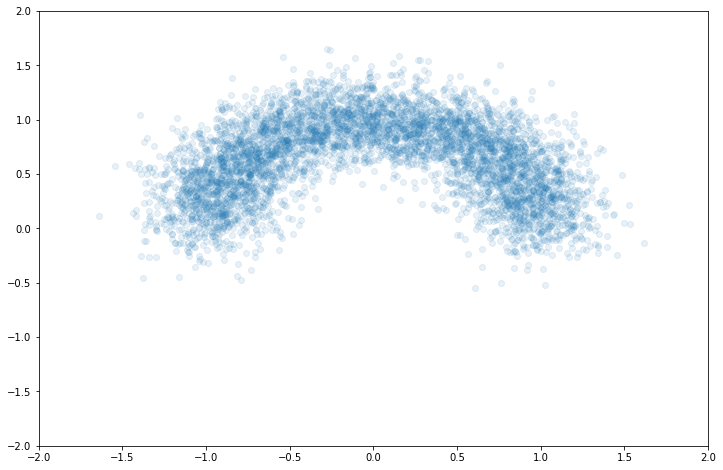

In [150]:
n = 5000
thetas = np.random.uniform(0, np.pi, size=n)
xs = np.cos(thetas) + np.random.normal(loc=0., scale=0.2, size=n)
ys = np.sin(thetas) + np.random.normal(loc=0., scale=0.2, size=n)

XT = np.concatenate((np.expand_dims(xs, axis=-1), np.expand_dims(ys, axis=-1)), axis=-1)
cov_matrix = XT.T @ XT
cov_x_y = cov_matrix[0,1]
sigma_x = np.sqrt(cov_matrix[0,0])
sigma_y = np.sqrt(cov_matrix[1,1])
print("correlation factor:", cov_x_y / (sigma_x * sigma_y))

plt.figure(figsize=(12, 8))
plt.scatter(xs, ys, alpha=0.1)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.show()

We could try to predict the Y from the X, and if we can, then it means that there is correlation.

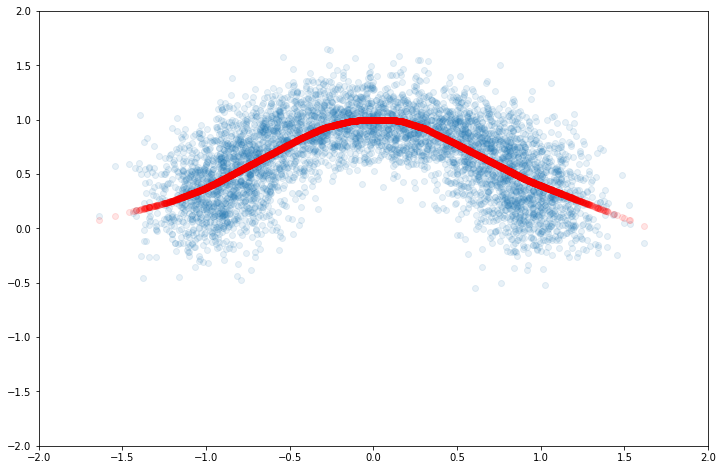

In [156]:
model = nn.Sequential(
    nn.Linear(1, 32),
    nn.ReLU(),
    nn.Linear(32, 1))

model.train()
optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)
criterion = nn.MSELoss()
ds = data.TensorDataset(torch.FloatTensor(xs).unsqueeze(-1),
                        torch.FloatTensor(ys).unsqueeze(-1))
loader = data.DataLoader(ds, shuffle=True, batch_size=100)

for _ in range(25):
    episode_loss = 0.
    for x, y in loader:
        y_p = model(x)
        loss = criterion(y_p, y)
        optimizer.zero_grad()
        loss.backward()
        episode_loss += loss.item()
        optimizer.step()
    # print(episode_loss)

model.eval()
y_pred = model(torch.FloatTensor(xs).unsqueeze(-1)).detach().numpy()
    
plt.figure(figsize=(12, 8))
plt.scatter(xs, ys, alpha=0.1)
plt.scatter(xs, y_pred, alpha=0.1, color='red')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.show()

But this is not going to work for all distributions. For some distribution, for we do not have a function $y=f(x)$, but an **implicit function**, such as $x^2 + y^2 = 1$.

In maths, we can consider this:

* a function of 2 variables x and y, and have an equation f(x, y) = 1
* a parametric curve (add one hidden parameter 't') for $x(t)^2 + y(t)^2$ and have the equation f(t) = 1



correlation factor: 0.009054945024993585


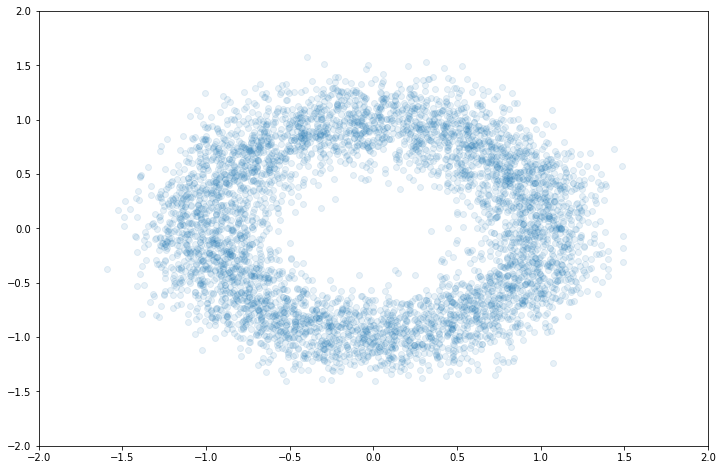

In [157]:
n = 5000
thetas = np.random.uniform(-np.pi, np.pi, size=n)
xs = np.cos(thetas) + np.random.normal(loc=0., scale=0.2, size=n)
ys = np.sin(thetas) + np.random.normal(loc=0., scale=0.2, size=n)

XT = np.concatenate((np.expand_dims(xs, axis=-1), np.expand_dims(ys, axis=-1)), axis=-1)
cov_matrix = XT.T @ XT
cov_x_y = cov_matrix[0,1]
sigma_x = np.sqrt(cov_matrix[0,0])
sigma_y = np.sqrt(cov_matrix[1,1])
print("correlation factor:", cov_x_y / (sigma_x * sigma_y))

plt.figure(figsize=(12, 8))
plt.scatter(xs, ys, alpha=0.1)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.show()

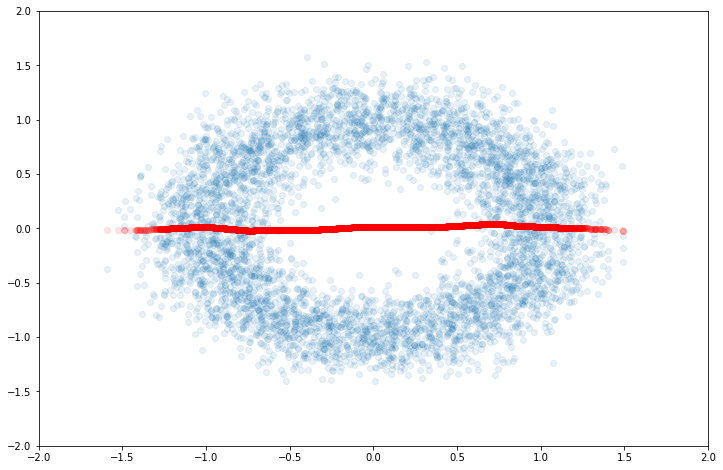

In [158]:
model = nn.Sequential(
    nn.Linear(1, 32),
    nn.ReLU(),
    nn.Linear(32, 1))

model.train()
optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)
criterion = nn.MSELoss()
ds = data.TensorDataset(torch.FloatTensor(xs).unsqueeze(-1),
                        torch.FloatTensor(ys).unsqueeze(-1))
loader = data.DataLoader(ds, shuffle=True, batch_size=100)

for _ in range(25):
    episode_loss = 0.
    for x, y in loader:
        y_p = model(x)
        loss = criterion(y_p, y)
        optimizer.zero_grad()
        loss.backward()
        episode_loss += loss.item()
        optimizer.step()
    # print(episode_loss)

model.eval()
y_pred = model(torch.FloatTensor(xs).unsqueeze(-1)).detach().numpy()
    
plt.figure(figsize=(12, 8))
plt.scatter(xs, ys, alpha=0.1)
plt.scatter(xs, y_pred, alpha=0.1, color='red')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.show()

# Bayesian regression
----

1.8718021769015916